## Clean and Analyse Employee Exit Surveys

---

In this project, we'll clean and analyze exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. We'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the <span style="color:crimson;background-color:#f9f1f3">dete_survey.csv</span>:

- <span style="color:crimson;background-color:#f9f1f3"> ID </span>: An id used to identify the participant of the survey
- <span style="color:crimson;background-color:#f9f1f3"> SeparationType </span>: The reason why the person's employment ended
- <span style="color:crimson;background-color:#f9f1f3"> Cease Date </span>: The year or month the person's employment ended
- <span style="color:crimson;background-color:#f9f1f3"> DETE Start Date </span>: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the <span style="color:crimson;background-color:#f9f1f3">tafe_survey.csv:</span>

- <span style="color:crimson;background-color:#f9f1f3"> Record ID </span>: An id used to identify the participant of the survey
- <span style="color:crimson;background-color:#f9f1f3"> Reason for ceasing employment </span>: The reason why the person's employment ended
-  <span style="color:crimson;background-color:#f9f1f3"> LengthofServiceOverall. Overall Length of Service at Institute (in years) </span>: The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

---

In [1]:
import pandas as pd
import numpy as np

# read datasets
dete_survey = pd.read_csv('data/dete_survey.csv')
tafe_survey = pd.read_csv('data/tafe_survey.csv', encoding='utf=8')

In [2]:
# closer look at dete_survey data
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# closer look at dete_survey data
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


---

From the cells above, we can make the following observations:

- The <span style="color:crimson;background-color:#f9f1f3">dete_survey</span> dataframe contains <span style="color:crimson;background-color:#f9f1f3">'Not Stated'</span> values that indicate values are missing, but they aren't represented as <span style="color:crimson;background-color:#f9f1f3">NaN</span>.
- Both the <span style="color:crimson;background-color:#f9f1f3">dete_survey</span> and <span style="color:crimson;background-color:#f9f1f3">tafe_survey</span> dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Identify Missing Values and Drop Unneccessary Columns

To start, we'll handle the first two issues. We can use the <span style="color:crimson;background-color:#f9f1f3">pd.read_csv()</span> function to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

---

In [4]:
# re-read dete_survey dataset specifying na_values parameter
dete_survey = pd.read_csv('data/dete_survey.csv', na_values='Not Stated')

# remove unnecessary columns from datasets
dete_survey.drop(dete_survey.columns[28:49], axis=1, inplace=True)
tafe_survey.drop(tafe_survey.columns[17:66], axis=1, inplace=True)

---

### Clean Column Names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names. We can use the <span style="color:crimson;background-color:#f9f1f3">DataFrame.columns</span> attribute along with vectorized string methods to update all of the columns at once.

---

In [5]:
# update column names
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(' ', '_')
tafe_survey.rename({'Record ID':'id', 'CESSATION YEAR':'cease_date',
                    'Reason for ceasing employment':'separationtype',
                    'Gender. What is your Gender':'gender', 'CurrentAge. Current Age':'age',
                    'Employment Type. Employment Type':'employment_status',
                    'Classification. Classification':'position',
                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
                    'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}, 
                   axis=1, inplace=True)

---

In the above cell, we renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need. 

Recall that one of our end goals is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

### Filter Data

If we look at the unique values in the <span style="color:crimson;background-color:#f9f1f3">separationtype</span> columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string <span style="color:crimson;background-color:#f9f1f3">'Resignation'</span>.

The <span style='color:crimson;background-color:#f9f1f3'>dete_survey</span> dataframe contains multiple separation types with the string <span style='color:crimson;background-color:#f9f1f3'>'Resignation'</span>:

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We'll have to account for each of these variations so we don't unintentionally drop data!

---

In [6]:
dete_survey['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [7]:
tafe_survey['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [8]:
# select only the data for resignations - for both datasets
dete_resignations = dete_survey.copy()
dete_resignations = dete_resignations[dete_resignations['separationtype'].str.contains('Resignation')]

tafe_resignations = tafe_survey.copy()
tafe_resignations = tafe_resignations[tafe_resignations['separationtype'].str.contains('Resignation') == True]

---

### Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).

Next, we'll focus on verifying that the years in the <span style='color:crimson;background-color:#f9f1f3'>cease_date</span> and <span style='color:crimson;background-color:#f9f1f3'>dete_start_date</span> columns make sense. 

- Since the <span style='color:crimson;background-color:#f9f1f3'>cease_date</span> is the last year of the person's employment and the <span style='color:crimson;background-color:#f9f1f3'>dete_start_date</span> is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the <span style='color:crimson;background-color:#f9f1f3'>dete_start_date</span> was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

---

In [9]:
# view state of current unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [10]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [11]:
# Check the unique values and look for outliers
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [12]:
# Check the unique values
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

---

From the cells above, we can verify that:

- There aren't any major issues with the years.
- The years in both dataframes don't completely align. The <span style='color:crimson;background-color:#f9f1f3'>tafe_survey</span> dataframe contains some cease dates in 2009, but the <span style='color:crimson;background-color:#f9f1f3'>dete_survey</span> dataframe does not. The <span style='color:crimson;background-color:#f9f1f3'>tafe_survey</span> dataframe also contains many more cease dates in 2010 than the <span style='color:crimson;background-color:#f9f1f3'>dete_survey</span> dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

### Create a New Column

Now that we've verified the years in the <span style='color:crimson;background-color:#f9f1f3'>dete_resignations</span> dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of *service*.

You may have noticed that the <span style='color:crimson;background-color:#f9f1f3'>tafe_resignations</span> dataframe already contains a "service" column, which we renamed to <span style='color:crimson;background-color:#f9f1f3'>institute_service</span>. In order to analyze both surveys together, we'll have to create a corresponding <span style='color:crimson;background-color:#f9f1f3'>institute_service</span> column in <span style='color:crimson;background-color:#f9f1f3'>dete_resignations</span>.

We will subtract the <span style='color:crimson;background-color:#f9f1f3'>dete_start_date</span> from the <span style='color:crimson;background-color:#f9f1f3'>cease_date</span> in the <span style='color:crimson;background-color:#f9f1f3'>dete_resignations</span> dataframe, and assign the result to a new column named <span style='color:crimson;background-color:#f9f1f3'>institute_service</span>.

---

In [13]:
# create new column for years of service
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# quick check of the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

---

### Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey
- <span style='color:crimson;background-color:#f9f1f3'>Contributing Factors. Dissatisfaction</span>
- <span style='color:crimson;background-color:#f9f1f3'>Contributing Factors. Job Dissatisfaction</span>

2. dete_survey
- <span style='color:crimson;background-color:#f9f1f3'>job_dissatisfaction</span>
- <span style='color:crimson;background-color:#f9f1f3'>dissatisfaction_with_the_department</span>
- <span style='color:crimson;background-color:#f9f1f3'>physical_work_environment</span>
- <span style='color:crimson;background-color:#f9f1f3'>lack_of_recognition</span>
- <span style='color:crimson;background-color:#f9f1f3'>lack_of_job_security</span>
- <span style='color:crimson;background-color:#f9f1f3'>work_location</span>
- <span style='color:crimson;background-color:#f9f1f3'>employment_conditions</span>
- <span style='color:crimson;background-color:#f9f1f3'>work_life_balance</span>
- <span style='color:crimson;background-color:#f9f1f3'>workload</span>

If the employee indicated any of the factors above caused them to resign, we'll mark them as <span style='color:crimson;background-color:#f9f1f3'>dissatisfied</span> in a new column. After our changes, the new <span style='color:crimson;background-color:#f9f1f3'>dissatisfied</span> column will contain just the following values:

- <span style='color:crimson;background-color:#f9f1f3'>True</span>: indicates a person resigned because they were dissatisfied in some way
- <span style='color:crimson;background-color:#f9f1f3'>False</span>: indicates a person resigned because of a reason other than dissatisfaction with the job
- <span style='color:crimson;background-color:#f9f1f3'>NaN</span>: indicates the value is missing

---

In [14]:
# check the unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [15]:
# check the unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [16]:
# update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(value):
    if value == '-':
        return False
    elif pd.isnull(value):
        return np.nan
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

In [17]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                                                       'physical_work_environment', 'lack_of_recognition', 
                                                       'lack_of_job_security', 'work_location','employment_conditions', 
                                                       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    201
True     110
Name: dissatisfied, dtype: int64

---

### Combine the Data

Now, we are finally ready to combine our datasets. The end goal is to aggregate the data according to the <span style='color:crimson;background-color:#f9f1f3'>institute_service</span> column.

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

---

In [18]:
# create institute column for each dataframe
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# drop columns with less than 500 non-null values
combined_updated = combined.dropna(axis=1, thresh=500).copy()

---

### Clean the Service Column

Now that the datasets have been combined, we are almost ready to perform some kind of analysis. However, we'll have to clean up the <span style='color:crimson;background-color:#f9f1f3'>institute_service</span> column. This column is tricky to clean because it currently contains values in a few different forms.

To analyse the data, we'll convert these numbers into categories. We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to their career stage instead of age is more effective. 

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Let's categorise the values in the <span style='color:crimson;background-color:#f9f1f3'>institute_service</span> column using the definitions above.

---

In [19]:
# check the current state of unique values for the institute service column
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [20]:
# extract the years of service and convert the type to float
combined_updated['service_years'] = combined_updated['institute_service'].astype(str).str.extract(r'([0-9]+)').astype(float)

# convert the years of service into categories
def service_to_category(value):
    if value >= 11:
        return 'Veteran'
    elif 7 <= value < 11:
        return 'Established'
    elif 3 <= value < 7:
        return 'Experienced'
    elif pd.isnull(value):
        return np.nan
    else:
        return 'New'    
combined_updated['service_category'] = combined_updated['service_years'].apply(service_to_category)

# check updates
combined_updated['service_category'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_category, dtype: int64

---

### Perform Initial Analysis

Above, we created a <span style='color:crimson;background-color:#f9f1f3'>service_category</span> column, that categorises employees according to the amount of years spent in their workplace.

Now, let's finally start some kind of initial analysis. We'll replace the missing values in the <span style='color:crimson;background-color:#f9f1f3'>dissatisfied</span> column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each <span style='color:crimson;background-color:#f9f1f3'>service_category</span> group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, *not* the final analysis.

---

In [21]:
# verify the number of unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    442
True     209
Name: dissatisfied, dtype: int64

In [22]:
# # replace the missing values with the most frequent value - False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

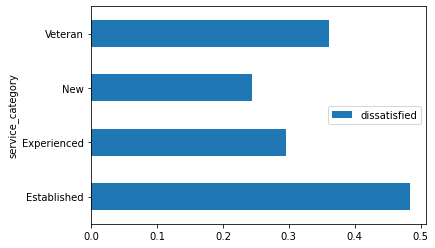

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# calculate the percentage of employees who resigned due to dissatisfaction in each category
cat_percentages = combined_updated.pivot_table(index='service_category', values='dissatisfied')

# plot
cat_percentages.plot.barh()
plt.show()

---

### Findings

From the initial analysis above, we can conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

---